In [282]:
import pandas as pd 
import matplotlib.pyplot as plt 
import numpy as np
import matplotlib.cm as cm
from scipy.stats import percentileofscore

In [283]:
# opening up dataframes to work with
df_2022 = pd.read_csv('advanced-rb-csvs/Advanced_2022.csv')
df_2023 = pd.read_csv('advanced-rb-csvs/Advanced_2023.csv')
df_2021 = pd.read_csv('advanced-rb-csvs/Advanced_2021.csv')
df_2019 = pd.read_csv('advanced-rb-csvs/Advanced_2019.csv')
df_2018 = pd.read_csv('advanced-rb-csvs/Advanced_2018.csv')
df_2017 = pd.read_csv('advanced-rb-csvs/Advanced_2017.csv')

In [284]:
# filtering dataframe so running backs need 100 or more carries
df_requirement = df_2023.loc[df_2023['ATT'] > 100].copy()

# creating a explosive ppg and broken tackle ppg for each player 
df_requirement['explosive_ppg'] = df_requirement['10+ YDS'] / df_requirement['G']
df_requirement['bkntckl_ppg'] = df_requirement['BRKTKL'] / df_requirement['G']

# getting league averages for all these stats 
average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(),2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(),2)


In [285]:
# creating dataframes for post and pre acl tears
bhall_pre_advanced = df_2022.loc[df_2022['Player'] == 'Breece Hall (NYJ)']
bhall_post_advanced = df_2023.loc[df_2023['Player'] == 'Breece Hall (NYJ)']

# getting stats
ypa = [bhall_pre_advanced['Y/ATT'].iloc[0], bhall_post_advanced['Y/ATT'].iloc[0], average_ypa]
YAcontactPA = [bhall_pre_advanced["YACON/ATT"].iloc[0], bhall_post_advanced["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(bhall_pre_advanced["BRKTKL"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["BRKTKL"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]
ExplosivePPG = [round(bhall_pre_advanced["10+ YDS"].iloc[0] / bhall_pre_advanced["G"].iloc[0], 2), round(bhall_post_advanced["10+ YDS"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2), average_explosive_ppg]

In [286]:
# setting years and colors for breece hall
years = ['2022', '2023', '2023 League Average']
colors = ['blue', 'green', 'red']

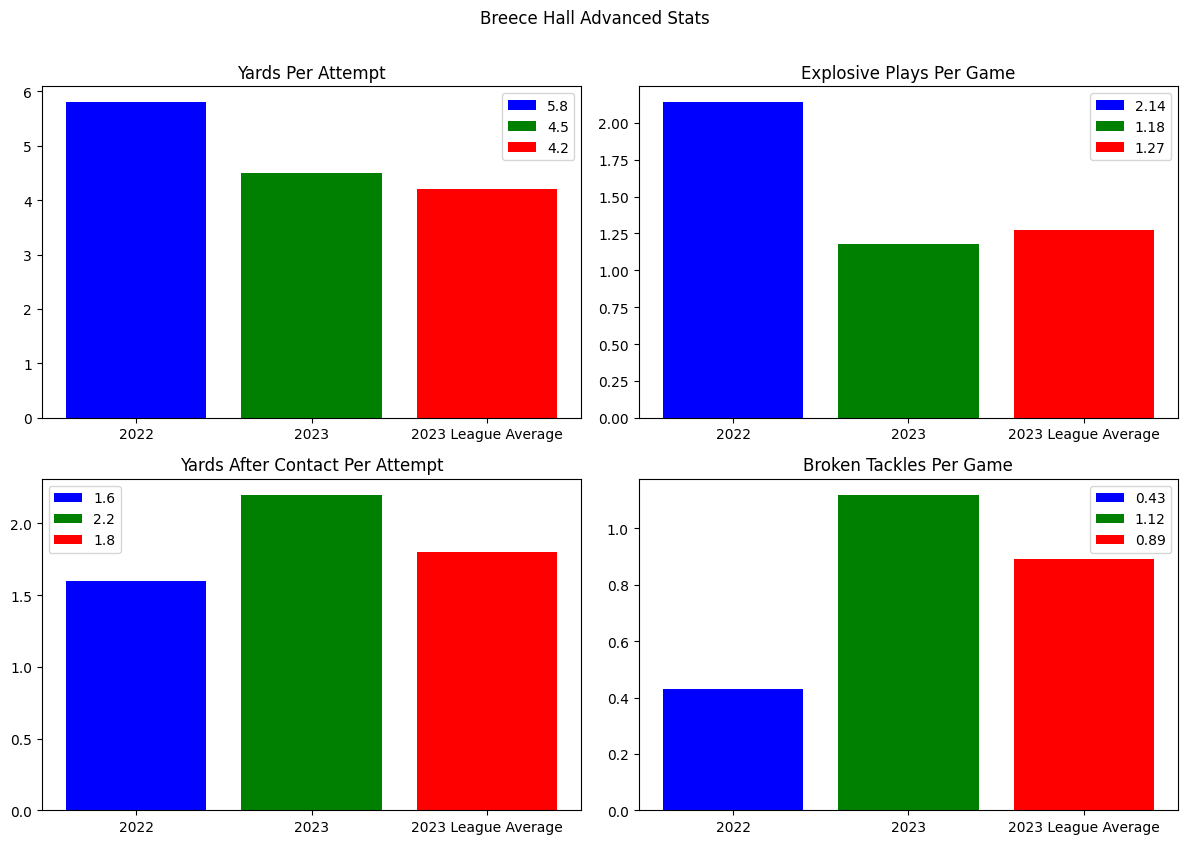

In [287]:
# creating 4 different plots 
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plotting yards per attempt metric
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# plotting explosive plays per game metric 
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# plotting yards after contact per attempt metric
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# plotting broken tackles per game metric 
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# making layout tighter
plt.tight_layout()

# title for figure 
fig.suptitle('Breece Hall Advanced Stats', y=1.05)

# Show and save the plots
plt.savefig('plots/breeceHallACL')
plt.show()

In [288]:
# creating vars for breece's 2023 stats
explosive_ppg = round(bhall_post_advanced["10+ YDS"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(bhall_post_advanced["BRKTKL"].iloc[0] / bhall_post_advanced["G"].iloc[0], 2)
ypa_ppg = bhall_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = bhall_post_advanced["YACON/ATT"].iloc[0]

# calculating percentiles
breece_ypa_percentile = round(percentileofscore(df_requirement['Y/ATT'], ypa_ppg), 2)
breece_explosiveppg_percentile = round(percentileofscore(df_requirement['explosive_ppg'], explosive_ppg), 2)
breece_YACPA_percentile = round(percentileofscore(df_requirement['YACON/ATT'], yacpa_ppg), 2)
breece_BRKN_percentile = round(percentileofscore(df_requirement['bkntckl_ppg'], brkntkl_ppg), 2)

# printing 
print(breece_ypa_percentile)
print(breece_explosiveppg_percentile)
print(breece_YACPA_percentile)
print(breece_BRKN_percentile)

69.79
39.58
90.62
72.92


In [289]:
# creating dataframes for post and pre acl tears
Jwilliams_pre_advanced = df_2022.loc[df_2022['Player'] == "Javonte Williams (DEN)"]
Jwilliams_post_advanced = df_2023.loc[df_2023['Player'] == "Javonte Williams (DEN)"]

# getting stats for Javonte williams 
ypa = [Jwilliams_pre_advanced['Y/ATT'].iloc[0], Jwilliams_post_advanced['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(Jwilliams_pre_advanced["10+ YDS"].iloc[0] / Jwilliams_pre_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["10+ YDS"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [Jwilliams_pre_advanced["YACON/ATT"].iloc[0], Jwilliams_post_advanced["YACON/ATT"].iloc[0], average_ypa]
BrokenTCKLPG = [round(Jwilliams_pre_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), round(Jwilliams_post_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]

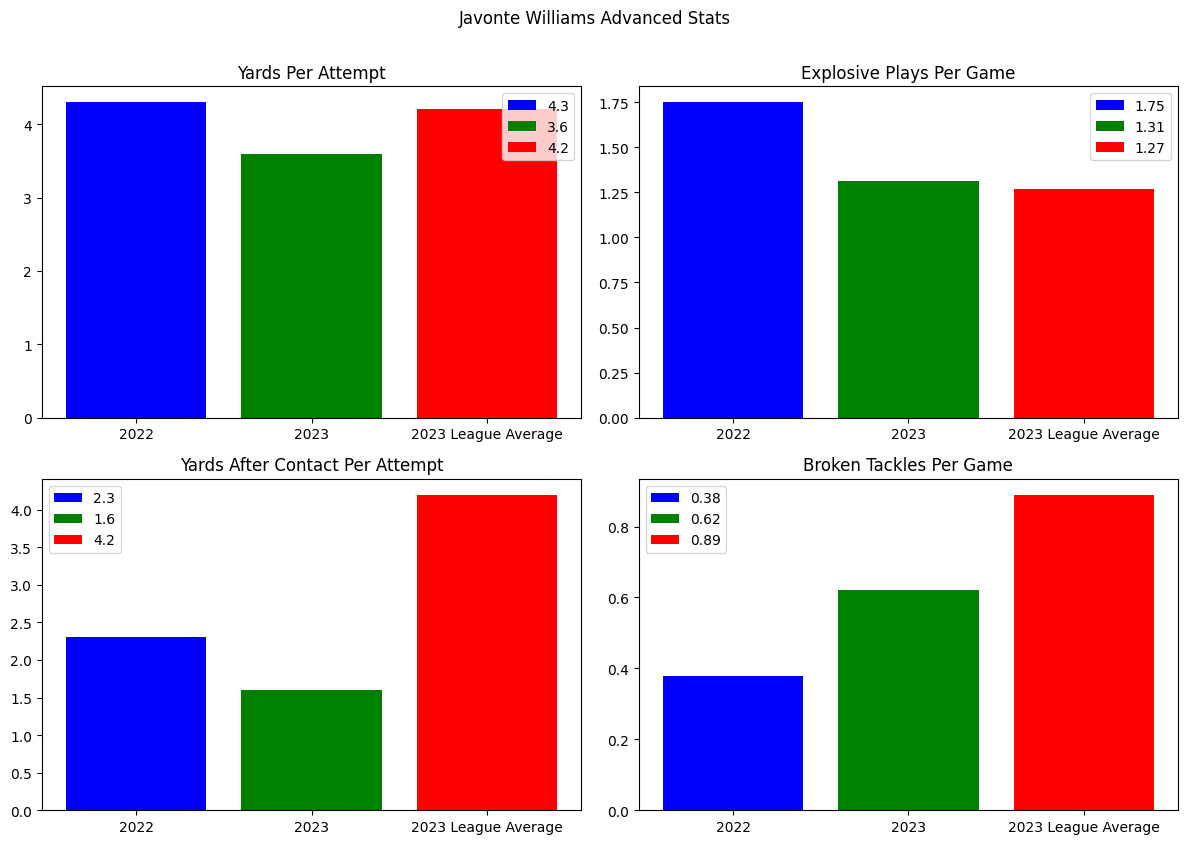

In [290]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plotting yards per attempt metric
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# plotting explosive plays per game metric 
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# plotting yards after contact pet attempt metric 
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# plotting broken tackles per game metric 
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# making layout tighter
plt.tight_layout()

# title for figure
fig.suptitle('Javonte Williams Advanced Stats', y=1.05)

# showing and saving plot
plt.savefig('plots/javonteWilliamsACL')
plt.show()

In [291]:
# creating post acl vars for williams
explosive_ppg = round(Jwilliams_post_advanced["10+ YDS"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(Jwilliams_post_advanced["BRKTKL"].iloc[0] / Jwilliams_post_advanced["G"].iloc[0], 2)
ypa_ppg = Jwilliams_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = Jwilliams_post_advanced["YACON/ATT"].iloc[0]

# calculating percentiles
jwilliams_ypa_percentile = round(percentileofscore(df_requirement['Y/ATT'], ypa_ppg), 2)
jwilliams_explosiveppg_percentile = round(percentileofscore(df_requirement['explosive_ppg'], explosive_ppg), 2)
jwilliams_YACPA_percentile = round(percentileofscore(df_requirement['YACON/ATT'], yacpa_ppg), 2)
jwilliams_BRKN_percentile = round(percentileofscore(df_requirement['bkntckl_ppg'], brkntkl_ppg), 2)

# printing
print(jwilliams_ypa_percentile)
print(jwilliams_explosiveppg_percentile)
print(jwilliams_YACPA_percentile)
print(jwilliams_BRKN_percentile)

19.79
50.0
34.38
31.25


In [292]:
# filtering dataframe so running backs need 100 or more carries
df_requirement = df_2021.loc[df_2021['ATT'] > 100].copy()

# calculating explosive plays per game and broken tackles per game 
df_requirement['explosive_ppg'] = df_requirement['10+ YDS'] / df_requirement['G']
df_requirement['bkntckl_ppg'] = df_requirement['BRKTKL'] / df_requirement['G']

# calculating league averages
average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(), 2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(), 2)

In [293]:
# creating post and pre acl tears for saquon
saquon_pre_advanced = df_2019.loc[df_2019['Player'] == "Saquon Barkley (NYG)"]
saquon_post_advanced = df_2021.loc[df_2021['Player'] == "Saquon Barkley (NYG)"]

# getting his stats to plot
ypa = [saquon_pre_advanced['Y/ATT'].iloc[0], saquon_post_advanced['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(saquon_pre_advanced["10+ YDS"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["10+ YDS"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [saquon_pre_advanced["YACON/ATT"].iloc[0], saquon_post_advanced["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(saquon_pre_advanced["BRKTKL"].iloc[0] / saquon_pre_advanced["G"].iloc[0], 2), round(saquon_post_advanced["BRKTKL"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2), average_broken_tcklppg]

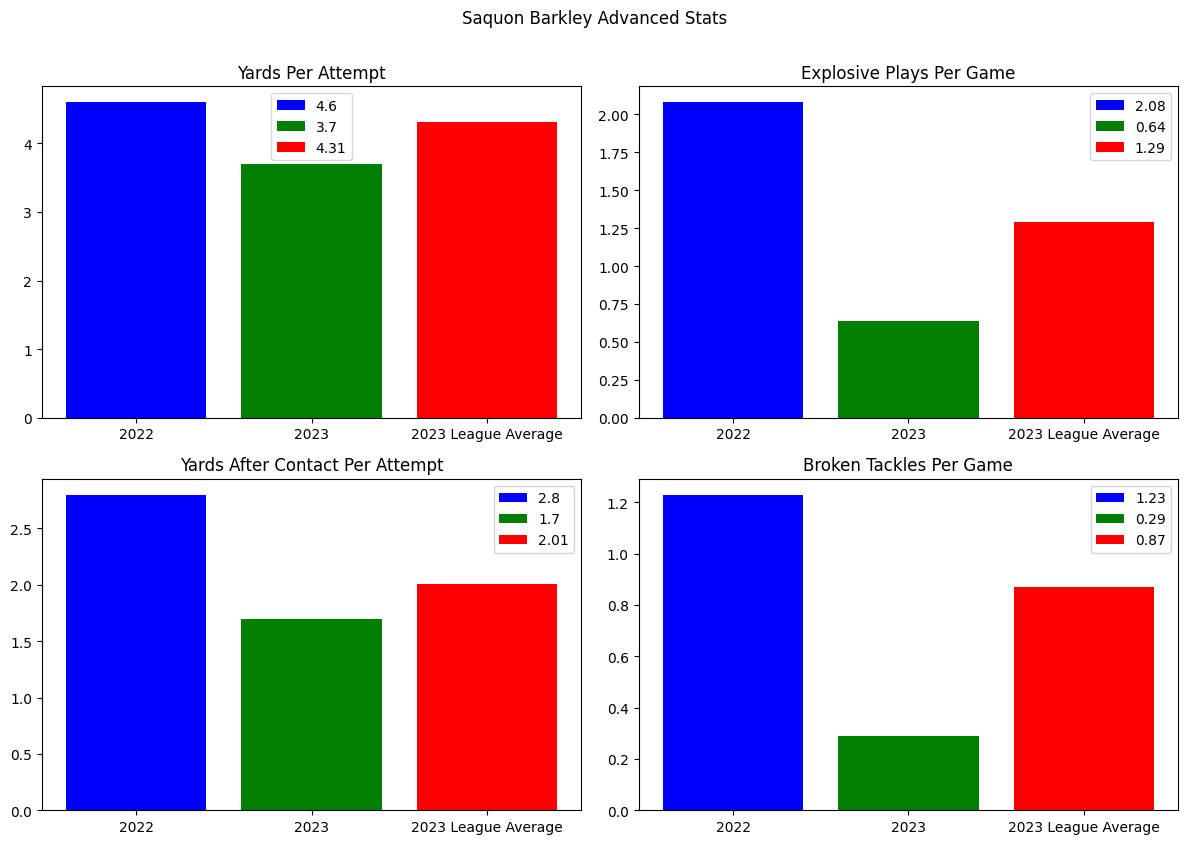

In [294]:
# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# Plot Y/ATT
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# Plot YBCON/ATT
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# Plot YACON/ATT
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# Plot BRKTKL/G
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# Adjust layout
plt.tight_layout()

# Show the plots
fig.suptitle('Saquon Barkley Advanced Stats', y=1.05)
plt.savefig('plots/SaquonBarkleyACL')
plt.show()

In [295]:
# getting saquons post acl tear data 
explosive_ppg = round(saquon_post_advanced["10+ YDS"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)
brkntkl_ppg = round(saquon_post_advanced["BRKTKL"].iloc[0] / saquon_post_advanced["G"].iloc[0], 2)
ypa_ppg = saquon_post_advanced['Y/ATT'].iloc[0]
yacpa_ppg = saquon_post_advanced["YACON/ATT"].iloc[0]

# calculating percentiles
ypa_percentile = round(percentileofscore(df_requirement['Y/ATT'], ypa_ppg), 2)
explosiveppg_percentile = round(percentileofscore(df_requirement['explosive_ppg'], explosive_ppg), 2)
yacpa_percentile = round(percentileofscore(df_requirement['YACON/ATT'], yacpa_ppg), 2)
brkn_percentile = round(percentileofscore(df_requirement['bkntckl_ppg'], brkntkl_ppg), 2)

# printing
print(ypa_percentile)
print(explosiveppg_percentile)
print(yacpa_percentile)
print(brkn_percentile)


15.31
10.2
23.47
12.24


In [296]:
# Getting the league averages for y/att for 2017
# Have to meet the following requirement: Over 100 attempts
df_requirement = df_2018.loc[df_2018['ATT'] > 100].copy()

# calculating explosive plays per game and broken tackles per game 
df_requirement['explosive_ppg'] = df_requirement['10+ YDS'] / df_requirement['G']
df_requirement['bkntckl_ppg'] = df_requirement['BRKTKL'] / df_requirement['G']


average_explosive_ppg = round(df_requirement['explosive_ppg'].mean(),2)
average_ypa = round(df_requirement['Y/ATT'].mean(), 2)
average_ypac = round(df_requirement['YACON/ATT'].mean(), 2)
average_broken_tcklppg = round(df_requirement['bkntckl_ppg'].mean(),2)

In [297]:
# getting pre and post acl tear 
cook_pre = df_2017.loc[df_2017['Player'] == "Dalvin Cook (BAL)"]
cook_post = df_2018.loc[df_2018['Player'] == "Dalvin Cook (BAL)"]

# getting cooks stats to graph
ypa = [cook_pre['Y/ATT'].iloc[0], cook_post['Y/ATT'].iloc[0], average_ypa]
ExplosivePPG = [round(cook_pre["10+ YDS"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_pre["10+ YDS"].iloc[0] / cook_post["G"].iloc[0], 2), average_explosive_ppg]
YAcontactPA = [cook_pre["YACON/ATT"].iloc[0], cook_post["YACON/ATT"].iloc[0], average_ypac]
BrokenTCKLPG = [round(cook_pre["BRKTKL"].iloc[0] / cook_pre["G"].iloc[0], 2), round(cook_post["BRKTKL"].iloc[0] / cook_post["G"].iloc[0], 2), average_broken_tcklppg]

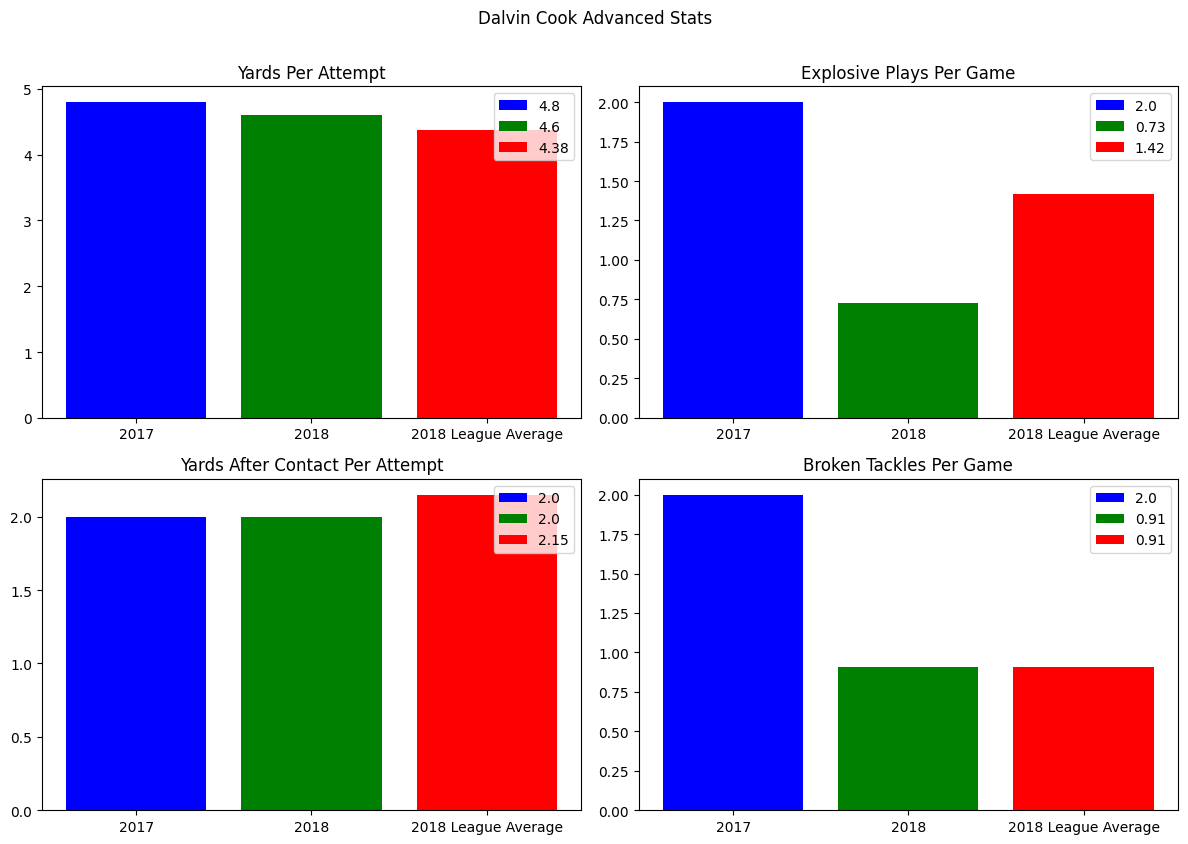

In [298]:
# years
years = ['2017', '2018', '2018 League Average']

# Create four separate plots
fig, axs = plt.subplots(2, 2, figsize=(12, 8))

# plotting yards per attempt 
axs[0, 0].bar(years, ypa, label=[str(i) for i in ypa], color=colors)
axs[0, 0].set_title('Yards Per Attempt')
axs[0, 0].legend()

# plotting explosive plays per game 
axs[0, 1].bar(years, ExplosivePPG, label=[str(i) for i in ExplosivePPG], color=colors)
axs[0, 1].set_title('Explosive Plays Per Game')
axs[0, 1].legend()

# plotting yards after contact per attempt 
axs[1, 0].bar(years, YAcontactPA, label=[str(i) for i in YAcontactPA], color=colors)
axs[1, 0].set_title('Yards After Contact Per Attempt')
axs[1, 0].legend()

# plotting broken tackles per game 
axs[1, 1].bar(years, BrokenTCKLPG, label=[str(i) for i in BrokenTCKLPG], color=colors)
axs[1, 1].set_title('Broken Tackles Per Game')
axs[1, 1].legend()

# tight layout
plt.tight_layout()

# title
fig.suptitle('Dalvin Cook Advanced Stats', y=1.05)

# showing and saving plot
plt.savefig('plots/DalvinCookACL')
plt.show()

In [299]:
# calculating post acl tear stats for cook
explosive_ppg = round(cook_post["10+ YDS"].iloc[0] / cook_post["G"].iloc[0], 2)
brkntkl_ppg = round(cook_post["BRKTKL"].iloc[0] / cook_post["G"].iloc[0], 2)
ypa_ppg = cook_post['Y/ATT'].iloc[0]
yacpa_ppg = cook_post["YACON/ATT"].iloc[0]

# calculating percentiles
ypa_percentile = round(percentileofscore(df_requirement['Y/ATT'], ypa_ppg), 2)
explosiveppg_percentile = round(percentileofscore(df_requirement['explosive_ppg'], explosive_ppg), 2)
yacpa_percentile = round(percentileofscore(df_requirement['YACON/ATT'], yacpa_ppg), 2)
brkn_percentile = round(percentileofscore(df_requirement['bkntckl_ppg'], brkntkl_ppg), 2)

# printing
print(ypa_percentile)
print(explosiveppg_percentile)
print(yacpa_percentile)
print(brkn_percentile)


54.26
57.45
39.36
57.45
